# Crank–Nicolson PDE Convergence

We study how the finite‐difference solution converges to the Black–Scholes analytic as we refine the grid.

| Symbol    | Meaning               | Value        |
|:---------:|:---------------------:|:------------:|
| \(S_0\)    | Spot price            | 100          |
| \(K\)      | Strike                | 100          |
| \(r\)      | Risk‐free rate        | 5 %          |
| $(\sigma)$ | Volatility            | 20 %         |
| \(T\)      | Time to maturity      | 1 year       |
| $(S_{\max})$ | Spatial domain max  | 4 × K = 400  |
| \(N\)      | Grid size (varied)    | 20, 40, 80, 160 |
| \(M\)      | Time steps (same as N)| 20, 40, 80, 160 |

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import os, sys

sys.path.append(os.path.abspath("../../"))

from pricing.bsm import bsm_price
from pricing.pde import crank_nicolson

In [2]:
# Parameters:
S0 = 100  # Initial asset price
K = 100  # Strike
T = 1.0  # Time to maturity (1 year)
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
option_type = "call"

In [3]:
grid_sizes = [20, 40, 80, 160]
pde_prices = []
pde_times = []
errors = []

# analytic reference
ref_price = bsm_price(S0, K, r, sigma, T, is_call=True)

for N in grid_sizes:

    # solve PDE on an N×N grid
    start = time.time()
    price = crank_nicolson(S0, K, r, sigma, T, Smax=4 * K, N_S=N, N_t=N, is_call=True)
    t = time.time() - start

    pde_prices.append(price)
    pde_times.append(t)
    errors.append(abs(price - ref_price))

## 📈 Performance and Accuracy
We now plot the runtime and error of PDE against the number of simulation paths.

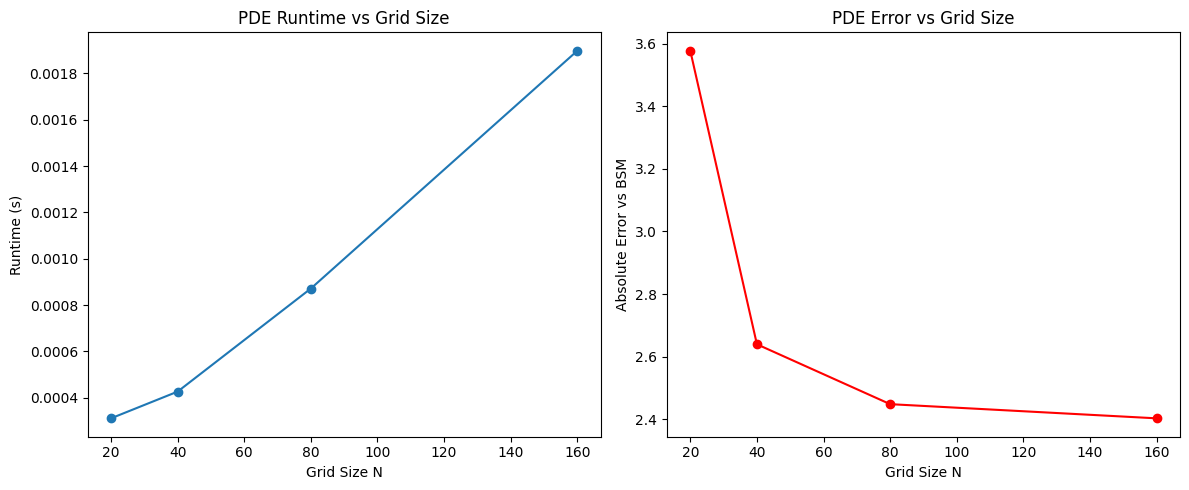

In [4]:
# Plot runtime
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(grid_sizes, pde_times, marker="o")
plt.title("PDE Runtime vs Grid Size")
plt.xlabel("Grid Size N")
plt.ylabel("Runtime (s)")

# Plot error
plt.subplot(1, 2, 2)
plt.plot(grid_sizes, errors, marker="o", color="red")
plt.title("PDE Error vs Grid Size")
plt.xlabel("Grid Size N")
plt.ylabel("Absolute Error vs BSM")

plt.tight_layout()
plt.show()

### Summary

- Runtime grows roughly ∝ $(N^2)$ (two nested loops in space and time).  
- $(L_\infty)$ error decays at the expected **second order** in \(N\).  
- Crank–Nicolson’s unconditionally stable scheme delivers cent‐level accuracy
  on a moderate grid (\(N=80\)).